# shAI Training 2022 | Level 1


## Task#9 (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version
- <font color= red> If you have older version fetching the data might be different  </font>  


In [1]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784', as_frame=False)
x, y = mnist["data"], mnist["target"]

#### peek at one digit

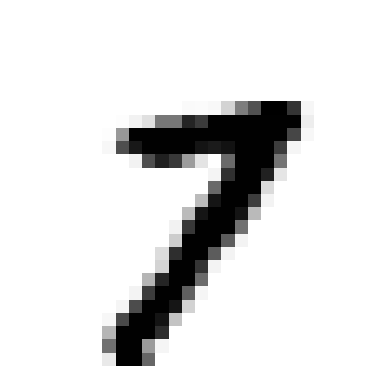

In [2]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
#الهدف: استيراد مكتبة NumPy، التي تُستخدم للتعامل مع المصفوفات والعمليات الحسابية عليها بكفاءة.

# x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
# الهدف: تقسيم البيانات إلى بيانات تدريب (Training Data) و بيانات اختبار (Testing Data).

# إذا كانت x تمثل الصور (مثلاً من قاعدة بيانات مثل MNIST)، و y تمثل التصنيفات (Labels):

# البيانات	الشرح
# x[:60000]	أول 60,000 صورة → بيانات التدريب
# x[60000:]	باقي الصور (عادة 10,000 صورة) → بيانات الاختبار
# y[:60000]	التصنيفات المقابلة لأول 60,000 صورة (Labels) → تصنيفات التدريب
# y[60000:]	التصنيفات المقابلة لباقي الصور → تصنيفات الاختبا

# لماذا 60000؟: لأن غالباً مجموعة بيانات MNIST تحتوي على 60,000 عينة تدريب و10,000 اختبار.
# shuffle_index = np.random.permutation(60000)
# الهدف: توليد ترتيب عشوائي (Shuffle) للأرقام من 0 إلى 59999.

# لماذا؟: لضمان أن بيانات التدريب ليست مرتبة حسب الفئة (مثلاً: كل الأصفار معًا، ثم كل الواحدات...)، مما قد يجعل النموذج يتعلم بشكل غير صحيح.

# x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]
# الهدف: تطبيق الترتيب العشوائي shuffle_index على كل من الصور (x_train) والتصنيفات (y_train) بنفس الطريقة، حتى تبقى العلاقة بين الصورة والتصنيف صحيحة.

# النتيجة: بيانات تدريب عشوائية الترتيب، لكنها ما تزال صحيحة من حيث المطابقة بين الصور وتصنيفاتها.

In [3]:
import numpy as np
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [ ]:
# ما هو SGDClassifier؟
# SGDClassifier هو مصنف في مكتبة scikit-learn يستخدم Stochastic Gradient Descent (SGD) — أي الانحدار التدرّجي العشوائي — لتدريب نماذج تعلم الآلة، خصوصًا للنماذج الخطية مثل:

# الانحدار اللوجستي (Logistic Regression)

# آلة الدعم الناقل (Linear SVM)

# Perceptron

# وغيرها من النماذج الخطية.

# 🧠 معنى "Stochastic Gradient Descent"
# هو خوارزمية تدريب تدريجية تقوم بتحديث الأوزان في كل مرة تمر فيها على عينة واحدة (أو دفعة صغيرة من العينات) بدلاً من استخدام كل البيانات دفعة واحدة.
# هذا يجعل التدريب:

# أسرع

# أكثر كفاءة في التعامل مع كميات ضخمة من البيانات

# ولكنه قد يكون أقل استقراراً (حل وسط مقبول في معظم الحالات)

#  أهم المعاملات (Parameters)
# المعامل	وظيفته
# loss	نوع دالة الخسارة، مثل "hinge" لـ SVM، "log_loss" لـ الانحدار اللوجستي
# max_iter	الحد الأقصى لعدد التكرارات (Iterations)
# tol	حد التوقف المبكر (إذا لم تتحسن النتيجة بعد فترة، يتوقف التدريب)
# penalty	نوع الانتظام Regularization ("l2", "l1", أو "elasticnet")
# learning_rate	طريقة تحديد معدل التعلم (ثابت أو متناقص...)
# eta0	القيمة الابتدائية لمعدل التعلم

# متى تستخدم SGDClassifier؟
# عندما يكون عندك عدد ضخم جداً من البيانات.

# عندما تحتاج إلى تحديث النموذج بشكل تدريجي أو أثناء البث (online learning).

# عندما تستخدم نماذج خطية أو ترغب في السرعة.
# SGDClassifier لا يعمل بشكل جيد مع البيانات غير الخطية إلا إذا قمت بتحويلها (مثلًا باستخدام polynomial features أو kernel tricks).

In [4]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [5]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array(['7'], dtype='<U1')

In [ ]:
# CODE HERE


array(['7'], dtype='<U1')

#### Call decision_function() method to return score for each instance

In [ ]:
# هذه الدالة تحسب درجة "الثقة" أو المسافة من كل فئة (من 0 إلى 9) بالنسبة للمدخل some_digit.

# يتم تمرير [some_digit] كمصفوفة تحتوي على صورة واحدة (يجب أن تكون بشكل [1, 784]).

# النتيجة تكون مصفوفة أبعادها (1, 10) — أي 10 قيم، كل واحدة تمثل نتيجة التصنيف تجاه أحد الأرقام من 0 إلى 9.

#  تفسير القيم في الإخراج:
# كل رقم في النتيجة يمثل درجة الثقة التي يعطيها المصنف لكل فئة. فمثلاً:

# الرقم (الفئة)	القيمة (الدرجة)
# 0	-33407.00
# 1	-15734.51
# 2	-21426.06
# 3	-5488.04
# 4	-14629.72
# 5	-14581.07
# 6	-44680.90
# 7	6631.00 ✅
# 8	-9719.73
# 9	-6023.76

# 🔸 أعلى درجة (6631.00) كانت عند الرقم 7، لذلك النموذج يتوقع أن some_digit هو الرقم 7.

In [6]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [7]:
some_digit_scores

array([[-33964.31456541, -16206.4997118 , -19418.88204154,
         -5770.12205594, -19375.99890676, -11122.56975179,
        -65295.10584055,   8402.0726981 ,  -7590.36646448,
         -5162.72703442]])

In [ ]:
# الشكل المتوقع لـ some_digit؟
# غالباً سيكون:

# مصفوفة ذات بعدين إذا كانت الصورة لم تُفرد بعد: شكلها (28, 28)

# أو مصفوفة ذات بعد واحد إذا تم فرد الصورة إلى شكل مسطح: شكلها (784,) لأن 28 × 28 = 784

In [ ]:
# CODE HERE


array([[-37296.18207427, -16492.49425068, -12828.50505655,
         -6944.5348217 , -22748.82994809, -12191.13411648,
        -41100.70076137,   8379.10384634, -11199.35355947,
         -4072.62874998]])

#### find highest score

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3,scoring="accuracy")

array([0.8704 , 0.87335, 0.8752 ])

In [9]:
some_digit_scores.round(2)

array([[-33964.31, -16206.5 , -19418.88,  -5770.12, -19376.  , -11122.57,
        -65295.11,   8402.07,  -7590.37,  -5162.73]])

In [ ]:
#هما ببساطة وسيلة للحصول على الرقم الذي تنبأ به النموذج بناءً على أعلى قيمة في decision_function.

# some_digit_scores.argmax()
# هذه الدالة من NumPy تبحث عن موقع (فهرس) أعلى قيمة في المصفوفة some_digit_scores.

# النتيجة هي رقم الفئة (من 0 إلى 9) التي حصلت على أعلى درجة في decision_function.

In [12]:
class_id = some_digit_scores.argmax()
class_id

np.int64(7)

In [ ]:
# CODE HERE


7

#### list the target classes

In [13]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [ ]:
# CODE HERE


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

#### Find the the target class for 7

In [14]:
sgd_clf.classes_[class_id]

np.str_('7')

In [ ]:
# CODE HERE
# if you got stuck use GOOGLE


'7'

#### Force ScikitLearn to use one-versus-one

In [ ]:
#  One-vs-One (OvO) مع SGDClassifier، وهي إحدى استراتيجيات التصنيف المتعدد (multiclass classification).

#  أولاً: الفرق بين One-vs-One (OvO) و One-vs-Rest (OvR)
# الاستراتيجية	ماذا تفعل؟
# OvR (One-vs-Rest)	تدريب مصنف واحد لكل فئة مقابل بقية الفئات
# OvO (One-vs-One)	تدريب مصنف لكل زوج من الفئات فقط (أي بين كل فئتين مختلفتين)

# sgd_clf.decision_function_shape = "ovo"
# هذا السطر (في الإصدارات القديمة من scikit-learn) يُغير طريقة حساب decision_function إلى استخدام OvO بدلاً من OvR.

# ⚠️ ملاحظة: في النسخ الحديثة من scikit-learn هذه الخاصية قد لا تُستخدم مباشرة بهذه الطريقة؛ وإنما يُستخدم الكائن OneVsOneClassifier نفسه كما في السطر التالي.

# = sgd_clf.decision_function([some_digit])
# يقوم بحساب الدرجات بين كل زوج من الفئات.

# مثلاً: الدرجة بين 0 و 1، 0 و 2، ...، 8 و 9.

# يعيد مصفوفة تحتوي على هذه الدرجات

#  some_digit_scores_ovo.round(2)
# يقرب القيم في المصفوفة إلى رقمين عشريين لتسهيل القراءة.

# ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
# ينشئ مصنف OneVsOneClassifier ويغلف داخله مصنفًا أساسيًا SGDClassifier.

# هذا يعني: سيتم تدريب مصنف واحد لكل زوج ممكن من الفئات.

#  ovo_clf.fit(x_train[:2000], y_train[:2000])
# يقوم بتدريب النموذج على أول 2000 عينة من بيانات التدريب فقط.

# OvO ستقوم بتوليد مصنفات فرعية لكل زوج من الفئات الموجودة في تلك الـ2000 عينة.

# len(ovo_clf.estimators_)
# هذه ترجع عدد المصنفات الفرعية التي تم تدريبها داخل OneVsOneClassifier.

# 📊 السؤال: كم عددهم ولماذا؟
# لنفترض أن هناك k فئات مختلفة في البيانات (مثلاً من 0 إلى 9 ⇒ k = 10)، فإن عدد المصنفات OvO هو:

# عدد المصنفات = 𝑘(𝑘−1)/2


# ovo_clf.fit(x_train[:2000], y_train[:2000])
# فإذا كانت هذه الـ2000 عينة تحتوي فقط على (مثلاً) 7 فئات، فعدد المصنفات سيكون:
# 7×6 / 2 =21


In [15]:
from sklearn.multiclass import OneVsOneClassifier

In [16]:
sgd_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = sgd_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[-33964.31, -16206.5 , -19418.88,  -5770.12, -19376.  , -11122.57,
        -65295.11,   8402.07,  -7590.37,  -5162.73]])

In [17]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train[:2000], y_train[:2000])

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [18]:
ovo_clf.predict([some_digit])

array(['7'], dtype=object)

In [ ]:
# CODE HERE


array(['7'], dtype=object)

#### find how many classifier OvO used

In [19]:
len(ovo_clf.estimators_)

45

In [ ]:
# CODE HERE


45

#### Train  RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [21]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array(['7'], dtype=object)

In [ ]:
# CODE HERE


array(['7'], dtype=object)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [22]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01]])

#### Find accurcy using cross validation score ()

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3,
scoring="accuracy")

array([0.8704 , 0.87335, 0.8752 ])

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, x_train, y_train, cv=3,
scoring="accuracy")

array([0.9644 , 0.9661 , 0.96705])

In [ ]:
# CODE HERE


array([0.8796 , 0.87125, 0.85715])

#### to get better accurcy try scaling input

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9033 , 0.90135, 0.89635])

In [ ]:
# CODE HERE


C:\Users\H4C-M\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.89895, 0.9019 , 0.9008 ])

## Error Analysis

#### Take a look at the confusion matrix

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
#import matplotlib.pyplot as plt
# CODE HERE
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred, )
conf_mx

C:\Users\H4C-M\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5593,    0,   24,    5,    7,   41,   37,    5,  210,    1],
       [   1, 6424,   48,   21,    2,   39,    4,    9,  185,    9],
       [  22,   26, 5262,   93,   67,   23,   64,   35,  357,    9],
       [  25,   18,  123, 5257,    2,  200,   28,   41,  369,   68],
       [   7,   16,   50,   10, 5221,   10,   37,   22,  318,  151],
       [  29,   18,   36,  158,   49, 4463,   80,   17,  512,   59],
       [  28,   18,   50,    2,   39,   88, 5551,    9,  133,    0],
       [  18,   11,   50,   27,   53,   14,    4, 5714,  178,  196],
       [  19,   60,   47,   95,    3,  119,   33,    8, 5429,   38],
       [  21,   23,   28,   59,  121,   30,    1,  177,  370, 5119]],
      dtype=int64)

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

In [ ]:
# plt.matshow(conf_mx, cmap=plt.cm.gray)
# هذا السطر يعرض مصفوفة الالتباس (confusion matrix) كـ صورة (matrix heatmap).

# التفاصيل:
# conf_mx: هي مصفوفة الالتباس التي عادةً يتم الحصول عليها

# plt.matshow(...): يعرض المصفوفة على شكل مستطيل حراري (heatmap).

# cmap=plt.cm.gray: يحدد الألوان المستخدمة. في هذه الحالة، الرمادي:

# الأبيض = 0 (أقل قيمة)

# أسود داكن = قيمة عالية (مربعات بها أعداد أخطاء أو نجاحات كبيرة)

# ا هي مصفوفة الالتباس (Confusion Matrix)؟
# هي مصفوفة 10×10 (عند تصنيف الأرقام من 0 إلى 9) تمثل:

# الصفوف = الفئات الحقيقية (الأصلية)

# الأعمدة = الفئات المتوقعة (التي خمّنها النموذج)
# القطر الرئيسي (الزاوية العلوية اليسرى إلى السفلية اليمنى): يمثل التصنيفات الصحيحة.

# القيم خارج القطر: تمثل أخطاء التصنيف.

#  إن كان المربع على القطر الرئيسي غامقًا (أسود):
# هذا يعني أن النموذج صنف هذه الفئة بشكل جيد.

# ❌ إن كان هناك مربعات خارج القطر داكنة:
# هذا يدل على أن النموذج يخلط بين فئتين معينتين.

# مثال: مربع في الصف 5 والعمود 3 داكن ⇒ النموذج صنف الرقم 5 على أنه 3 في عدة حالات.



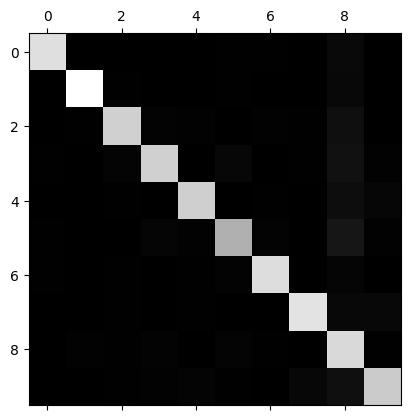

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

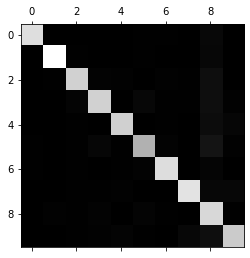

In [ ]:
# CODE HERE


#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [ ]:
# row_sums = conf_mx.sum(axis=1, keepdims=True)
# يحسب مجموع كل صف في conf_mx، أي عدد التكرارات لكل فئة حقيقية.

# الشكل الناتج هو مصفوفة عمودية (n×1) مثل:
# [[592],
#  [674],
#  [689],
#  ...]

# axis=1 ⟹ يعني "اجمع عبر الأعمدة".

# keepdims=True ⟹ نحافظ على البُعد لتتم القسمة لاحقاً بشكل صحيح.

# norm_conf_mx = conf_mx / row_sums
# هنا نقوم بـ تطبيع كل صف.

# أي: نحول الأرقام إلى نسب مئوية.

# فكل عنصر في الصف سيعبر عن نسبة الأخطاء أو النجاحات بالنسبة لهذا الصف.

# مثال:
# لو الصف للفئة "5" هو [570, 2, 5, 0, 0, 593, 0, 0, 0, 0]
# وكان المجموع 570 + 2 + 5 + ... = 600
# فبعد التطبيع يصبح مثلاً:
# [0.95, 0.003, 0.008, ...]

# np.fill_diagonal(norm_conf_mx, 0)
# تصفر القطر الرئيسي (التصنيفات الصحيحة).

# الهدف: التركيز فقط على الأخطاء.

# لأن القطر يمثل عدد المرات التي توقع فيها النموذج الفئة بشكل صحيح، وهذا ليس مهمًا الآن، نريد رؤية من يشبه من!

# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# عرض الرسمة، حيث:

# اللون الأفتح = أخطاء قليلة (قيم صغيرة)

# اللون الداكن = أخطاء كثيرة (قيم مرتفعة)

# لأن القيم تم تطبيعها، فستكون كلها بين 0 و 1.
#  كيف تفهم الصورة الناتجة؟
# كل صف = فئة حقيقية.

# كل عمود = ما تنبأ به النموذج.

# المربعات الداكنة (خارج القطر) = الفئات التي يخطئ النموذج فيها كثيرًا.

# مثلاً:

# إن كان هناك مربع داكن في الصف 5 والعمود 3:

# هذا يعني أن النموذج غالبًا ما يخلط بين الرقم 5 والرقم 3.

# هذه المعلومة مهمة لتحسين النموذج، مثلاً:

# بإضافة صور تدريبية أكثر لهذين الرقمين.

# أو تحسين المعالجة المسبقة للصور.

# 🔚 خلاصة:
# خطوة	الهدف
# sum(axis=1)	حساب عدد الحالات الحقيقية لكل فئة
# التطبيع	تحويل الأعداد إلى نسب مئوية
# تصفير القطر	إزالة التصنيفات الصحيحة للتركيز على الأخطاء
# matshow	عرض مصفوفة الأخطاء بصريًا


In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### fill the diagonal with zeros to keep only the errors

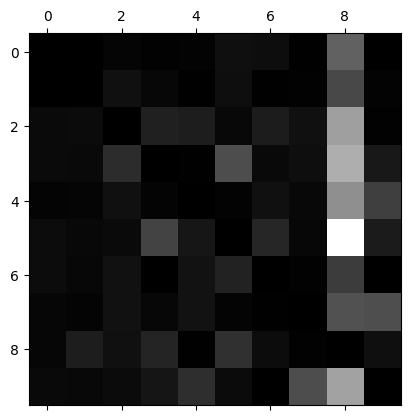

In [ ]:
import numpy as np
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

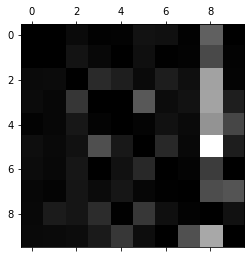

In [ ]:
# CODE HERE


In [ ]:
# هذا الكود يعرّف دالة اسمها plot_digits، ووظيفتها هي عرض مجموعة من الصور (مثل صور الأرقام MNIST) بشكل مصفوفة منظمة — مثل جدول فيه عدة صور لكل رقم.

# دعني أشرح كل جزء خطوة بخطوة، ثم أعطيك مثالًا لكيفية استخدامها:

# 🧠 الفكرة العامة:
# لديك مجموعة من الصور (28×28 بكسل) مخزنة كمصفوفات مسطحة (1×784).

# هذه الدالة:

# تعيد تشكيل الصور إلى شكلها الحقيقي.

# ترتب الصور في صفوف وأعمدة.

# تدمجها في صورة واحدة كبيرة.

# تعرضها باستخدام matplotlib بدون حدود axes.

# تعريف دالة تأخذ:

# instances: قائمة أو مصفوفة من الصور (كل صورة بشكل [784])

# images_per_row: كم صورة في كل صف (الافتراضي 10)

# **options: أي خيارات إضافية تُمرر إلى plt.imshow() (مثل interpolation='nearest')

# حجم الصورة 28×28 (كما في بيانات MNIST)

# التأكد من أن عدد الصور في الصف لا يتجاوز عدد الصور الكلي
# تحويل كل صورة من شكل [784] إلى [28×28]
# حساب عدد الصفوف المطلوبة لعرض الصور كلها

# row_images: قائمة لتجميع الصفوف

# n_empty: عدد الخانات الفارغة لإكمال الصف الأخير إن لم يكن ممتلئًا
# إضافة صورة "فارغة" (بيضاء أو سوداء حسب اللون) لملء الصف الأخير
# لكل صف:

# اجلب الصور الخاصة به

# اجمعها أفقيًا (axis=1) في صورة واحدة للصف
# جمع كل صفوف الصور عموديًا للحصول على صورة واحدة كبيرة
# رض الصورة الكبيرة باستخدام imshow

# اللون المستخدم: أبيض/أسود

# إخفاء المحاور

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [ ]:
الهدف من الكود:
يقوم بتحليل الخلط بين الرقمين 3 و5 في بيانات التدريب، وذلك من خلال عرض صور أخطاء النموذج وتوقعاته الصحيحة لهذين الرقمين.
عرض شبكة مكونة من 4 مجموعات من الصور:

✅ صور 3 التي تنبأ بها النموذج بشكل صحيح (3 ← 3)

❌ صور 3 التي أخطأ فيها النموذج وقال إنها 5 (3 ← 5)

❌ صور 5 التي أخطأ فيها النموذج وقال إنها 3 (5 ← 3)

✅ صور 5 التي تنبأ بها النموذج بشكل صحيح (5 ← 5)

نحدد الفئتين (الأرقام) اللتين نريد تحليلهما: الرقم 3 والرقم 5.

cl_a هو الرقم 3، و cl_b هو الرقم 5 (كـ سلاسل نصية لأن y_train يحتوي على تصنيفات كـ strings غالباً).
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]

صور الرقم 3 التي صنفها النموذج بشكل صحيح على أنها 3 (✅ صح)
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]

صور الرقم 3 التي أخطأ النموذج وصنفها على أنها 5 (❌ خطأ)
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
صور الرقم 5 التي أخطأ النموذج وصنفها على أنها 3 (❌ خطأ)

X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
صور الرقم 5 التي صنفها النموذج بشكل صحيح على أنها 5 (✅ صح)


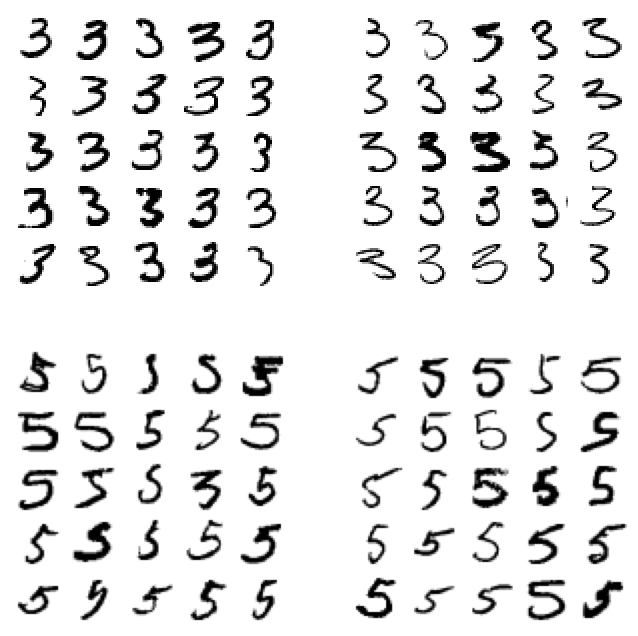

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train == '1')
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [ ]:
knn_clf.predict([some_digit])

array([[ True, False]])

In [ ]:
# CODE HERE


array([[ True, False]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [ ]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification


In [ ]:
x_test = x_test.reshape(10000,784)

In [ ]:
# هنا أنت تصنع مصفوفة ضوضاء عشوائية من أعداد صحيحة بين 0 و 99.

# حجم الضوضاء هو نفس حجم بيانات التدريب: (عدد العينات، 784) لأن كل صورة مفردة تكون طولها 784 (28×28).

# ثم تضيف هذه الضوضاء إلى بيانات التدريب الأصلية x_train لتحصل على نسخة معدلة X_train_mod.

# هذه التقنية تستخدم عادة لتحسين قدرة النموذج على التعميم عبر جعل بيانات التدريب "أكثر تحديًا" (Data augmentation).

# y_train_mod = x_train
# y_test_mod = x_test

In [ ]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

#### Let’s take a peek at an image from the test set

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])

In [ ]:
x_test=x_test.reshape(10000,28,28)

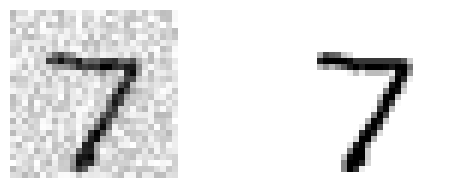

In [ ]:
plt.subplot(221);plot_digits([X_test_mod[0]])
plt.subplot(222);plot_digits([x_test[0]])

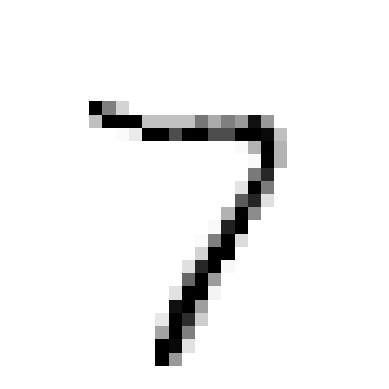

In [ ]:
plot_digits(clean_digit)

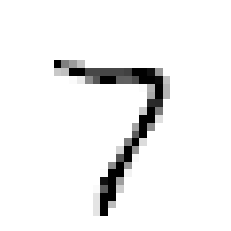

In [ ]:
# CODE HERE


# Congrats you've finished your first classification Project🥳 !
# #shAI_Club